## Assignment 3

### Question 1

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [41]:
from assignment_3_q1 import iterate_complex
div, itr = iterate_complex(200)

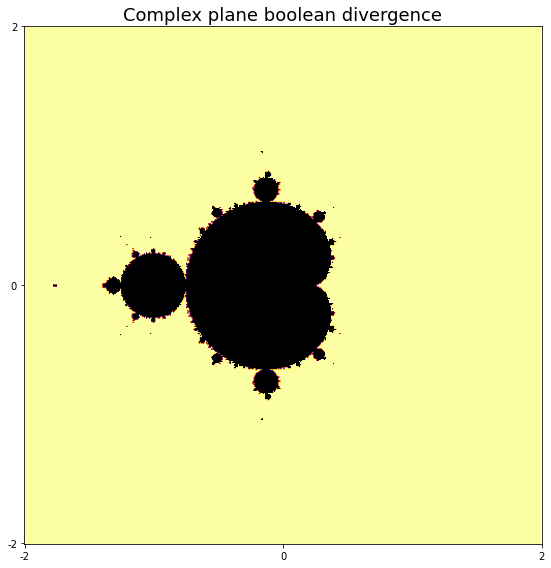

In [42]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.imshow(div,
           cmap='inferno',
           origin = 'lower')
#cbar = plt.colorbar()
ax.set_title("Complex plane boolean divergence", size=18)
fig.tight_layout()
ax.set_xticks((0,250,500))
ax.set_xticklabels(["-2", "0", "2"])
ax.set_yticks((0,250,500))
ax.set_yticklabels(["-2", "0", "2"])
fig.savefig("bool_div.png", dpi=150)

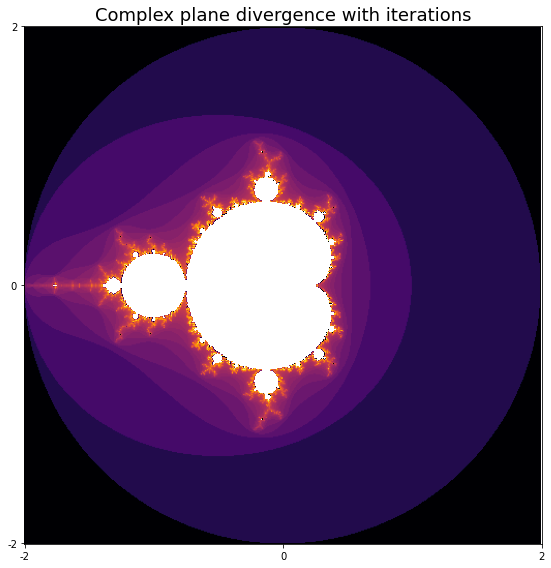

In [43]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.imshow(itr,
           cmap='inferno',
           norm = LogNorm(),
           origin = 'lower')
ax.set_title("Complex plane divergence with iterations", size=18)
fig.tight_layout()
ax.set_xticks((0,250,500))
ax.set_xticklabels(["-2", "0", "2"])
ax.set_yticks((0,250,500))
ax.set_yticklabels(["-2", "0", "2"])
fig.savefig("itr_div.png", dpi=150)

### Question 2

In [44]:
def w_dot(t, w, sigma, r, b):
    """
    Calculates the output of Lorenz's equations 25, 26, and 27
    
    Parameters
    t - Time variable
    w - An array contatining Lorenz X, Y, Z variables
    sigma - the Prandtl number
    r - the Rayleigh number
    b - dimensionless length scale
    
    Returns
    An array of the time derivative of X, Y, and Z
    """
    x_dot = -sigma*(w[0]-w[1])
    y_dot = r*w[0] - w[1] - w[0]*w[2]
    z_dot = -b*w[2] + w[0]*w[1]
    return x_dot, y_dot, z_dot

In [45]:
from scipy.integrate import solve_ivp
sigma, r, b = 10., 28, 8./3.
w0 = [0, 1, 0]
sol = solve_ivp(fun=w_dot, t_span=[0,60], y0=w0, args=[sigma, r, b], t_eval=np.arange(0, 60, 0.01))
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 5744
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 5.997e+01, 5.998e+01,
       5.999e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  9.51228548e-02,  1.82796883e-01, ...,
        -5.71270742e+00, -4.87589835e+00, -4.10171847e+00],
       [ 1.00000000e+00,  1.00353503e+00,  1.03238940e+00, ...,
         2.95895187e+00,  3.18292353e+00,  3.32079349e+00],
       [ 0.00000000e+00,  4.79005520e-04,  1.86706058e-03, ...,
         3.33254835e+01,  3.22880478e+01,  3.12943592e+01]])
 y_events: None

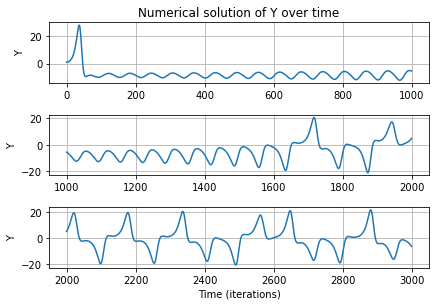

In [46]:
fig, ax = plt.subplots(3,1)
plt.tight_layout()
ax[0].plot(sol.t[:1000]/0.01, sol.y[1][:1000])
ax[1].plot(sol.t[1000:2000]/0.01, sol.y[1][1000:2000])
ax[2].plot(sol.t[2000:3000]/0.01, sol.y[1][2000:3000])

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[2].set_xlabel("Time (iterations)")
ax[0].set_ylabel("Y")
ax[1].set_ylabel("Y")
ax[2].set_ylabel("Y")
ax[0].set_title("Numerical solution of Y over time")
fig.savefig("num_sol.png", dpi=150)

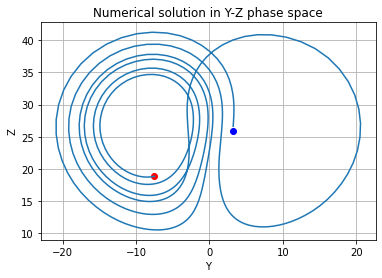

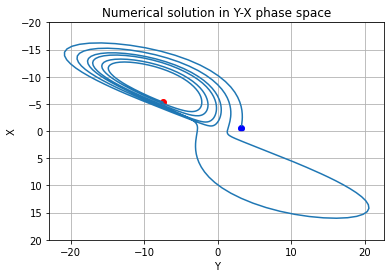

In [53]:
plt.plot(sol.y[1][1400:1900], sol.y[2][1400:1900])
plt.scatter(sol.y[1][1400], sol.y[2][1400], c='r')
plt.scatter(sol.y[1][1900], sol.y[2][1900], c='b')
plt.title("Numerical solution in Y-Z phase space")
plt.xlabel("Y")
plt.ylabel("Z")
plt.grid()
plt.savefig("yz_phase.png", dpi=150)
plt.show()

plt.plot(sol.y[1][1400:1900], sol.y[0][1400:1900])
plt.scatter(sol.y[1][1400], sol.y[0][1400], c='r')
plt.scatter(sol.y[1][1900], sol.y[0][1900], c='b')
plt.title("Numerical solution in Y-X phase space")
plt.xlabel("Y")
plt.ylabel("X")
plt.ylim(20, -20)
plt.grid()
plt.savefig("yx_phase.png", dpi=150)
plt.show()

In [54]:
wprime = [0, 1+1e-8, 0]
solprime = solve_ivp(fun=w_dot, t_span=[0,60], y0=wprime, args=[sigma, r, b], t_eval=np.arange(0, 60, 0.01))
solprime

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 5822
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 5.997e+01, 5.998e+01,
       5.999e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  9.51228557e-02,  1.82796885e-01, ...,
        -1.30675950e+01, -1.30439279e+01, -1.29416910e+01],
       [ 1.00000001e+00,  1.00353504e+00,  1.03238941e+00, ...,
        -1.32425275e+01, -1.24393541e+01, -1.15519185e+01],
       [ 0.00000000e+00,  4.79005529e-04,  1.86706062e-03, ...,
         3.28564146e+01,  3.36426507e+01,  3.42938411e+01]])
 y_events: None

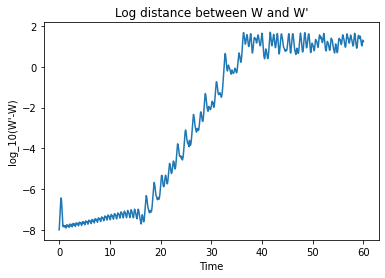

In [60]:
# Calculate error in W'
dist = np.sqrt((solprime.y[0]-sol.y[0])**2+(solprime.y[1]-sol.y[1])**2+(solprime.y[2]-sol.y[2])**2)

plt.plot(sol.t, np.log10(dist))
plt.title("Log distance between W and W'")
plt.xlabel("Time")
plt.ylabel("log_10(W'-W)")
plt.savefig("err_w.png", dpi=150)
plt.show()